# Regional proposal 
(via [MSER algorithm](https://en.wikipedia.org/wiki/Maximally_stable_extremal_regions)) 

In [1]:
%load_ext lab_black

import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def mser(img, seed=42):
    """
    apply MSER algorithm to get region proposals
    and add the bounding box on the image
    """

    mser_ = cv2.MSER_create()
    _, bboxes = mser_.detectRegions(img)

    seed = hash(str(seed))
    random.seed(seed)
    thickness = 2
    if len(list(img.shape)) == 3:
        color = [
            (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            for _ in range(len(bboxes))
        ]
    else:
        color = [(128, 0, 0) for _ in range(len(bboxes))]
    for index, box in enumerate(bboxes):

        image = cv2.rectangle(
            img,
            (box[0], box[1]),
            (box[0] + box[2], box[1] + box[3]),
            color[index],
            thickness,
        )
    fig = plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.imshow(image)


def get_rp_from_mser(img):
    """Obtain regional proposals from MSER algorithm"""

    # Convert the image into grayscale if it is not.
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply MSER to get bounding boxes
    mser_ = cv2.MSER_create()
    _, bboxes = mser_.detectRegions(img)
    bboxes = np.unique(bboxes, axis=0)
    bboxes = remove_overlap_rp(bboxes)

    rp = []
    # Crop bounding boxes
    for box in bboxes:
        rp.append(img[box[1] : box[1] + box[3], box[0] : box[0] + box[2]])

    return rp


def remove_overlap_rp(bboxes, threshold=0.9):
    """Remove rp is IoU > threshold"""

    res = []
    for box in bboxes:
        area = box[2] * box[3]
        # Disgard rp if it is too large
        if area >= 100 * 100:
            continue

        # Disgard rp if it is too small
        if box[2] < 10 or box[3] < 10:
            continue

        if not res:
            res.append(box)
        else:
            duplicate = False
            for rp in res:
                iou = get_iou(box, rp)
                if iou > threshold:
                    duplicate = True
                    break
            if not duplicate:
                res.append(box)
    return res


def get_iou(b1, b2):
    """Compute the IoU of 2 boxes"""

    inter_area = (min(b1[1] + b1[3], b2[1] + b2[3]) - max(b1[1], b2[1])) * (
        min(b1[0] + b1[2], b2[0] + b2[2]) - max(b1[0], b2[0])
    )
    b1_area = b1[2] * b1[3]
    b2_area = b2[2] * b2[3]
    #     print(b1_area, b2_area)
    iou = round(inter_area / (b1_area + b2_area - inter_area), 3)

    return iou

In [236]:
rps = get_rp_from_mser(img)

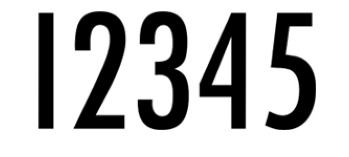

In [230]:
img = cv2.imread("../data/12345.png")
plt.axis("off")
plt.imshow(img)

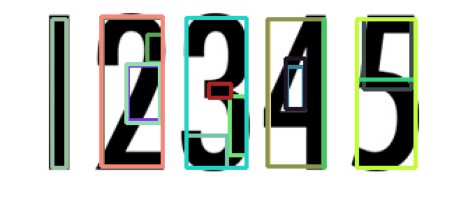

In [231]:
mser(img.copy(), seed=40)

### Try on grayscale image

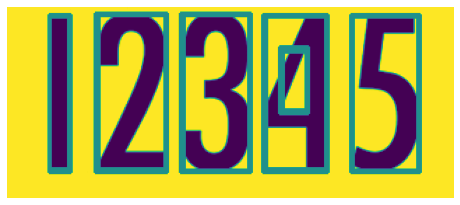

In [219]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mser(gray.copy(), seed=40)

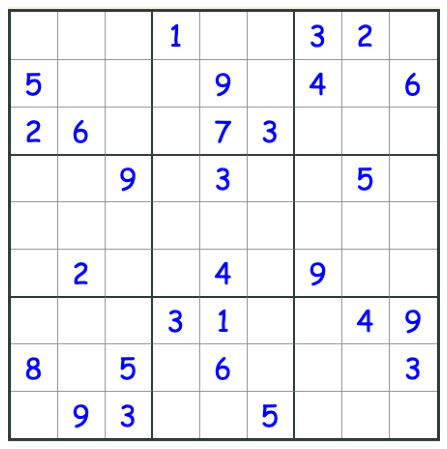

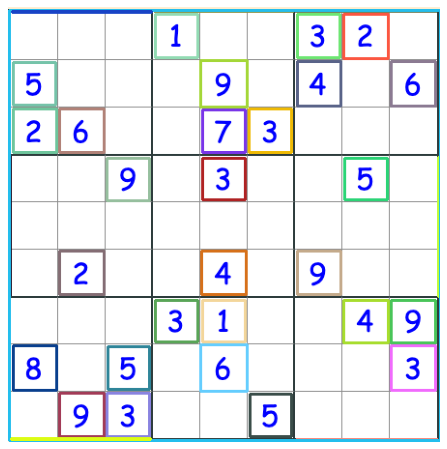

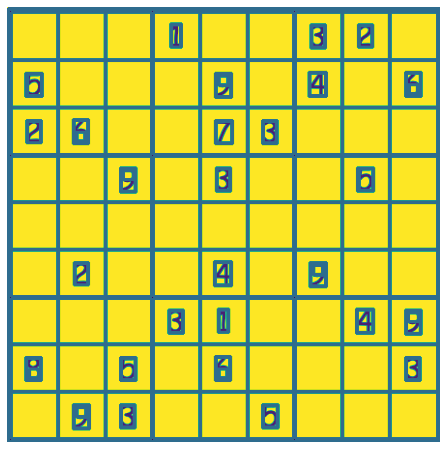

In [340]:
# Another try

img = cv2.imread("../data/sudoku_emp.png")
fig = plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(img)
mser(img.copy(), seed=40)
mser(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), seed=40)

---

## Crop them from the image after disgarding some of them

- Remove highly similar(iou>0.9) rp with other candidate
- Remove rp is its area is too large(>100*100)
- Remove rp when its height or weight is too small(<10)

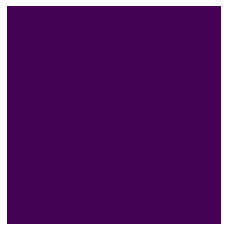

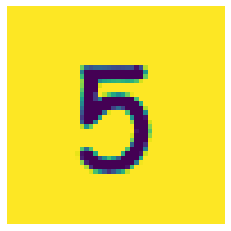

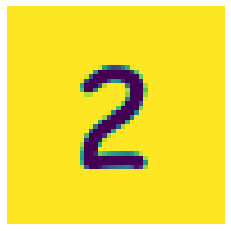

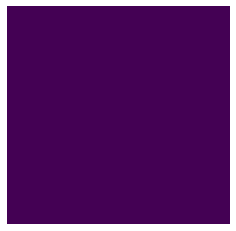

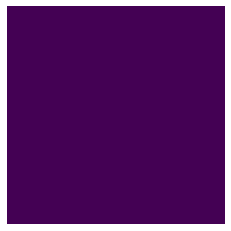

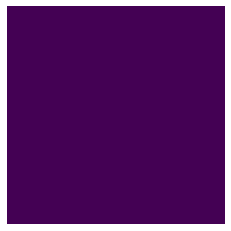

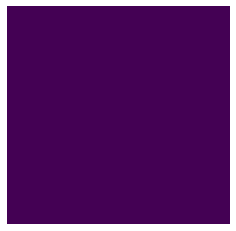

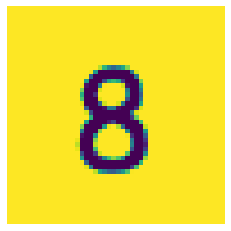

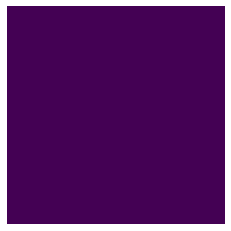

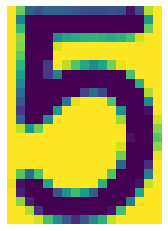

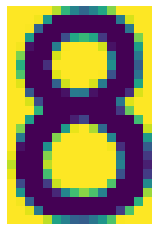

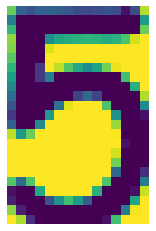

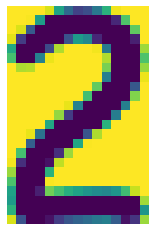

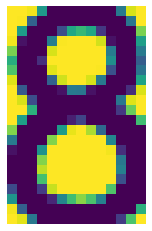

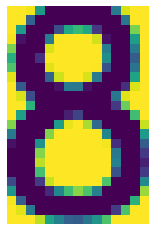

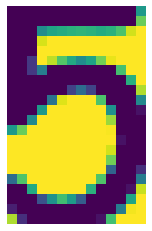

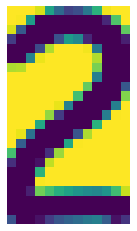

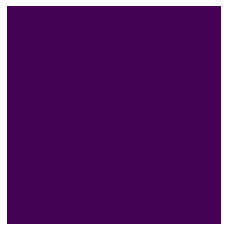

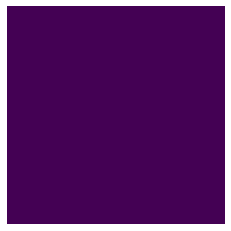

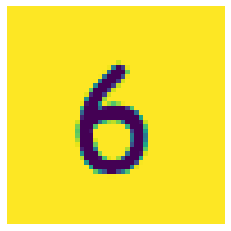

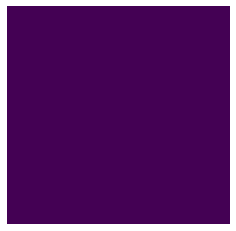

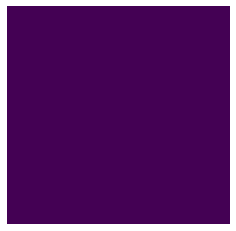

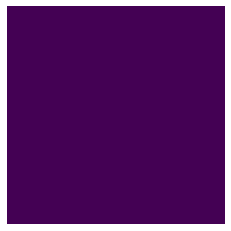

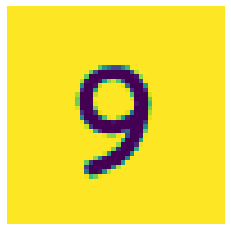

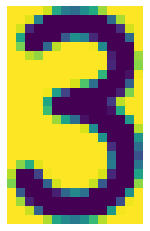

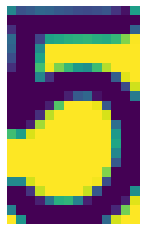

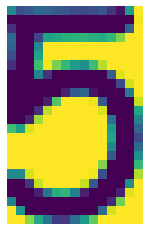

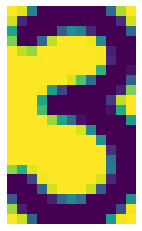

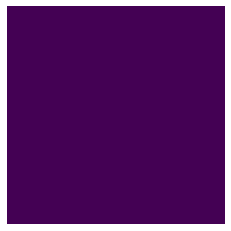

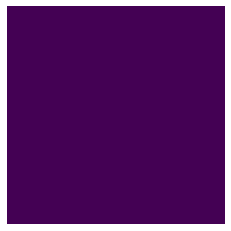

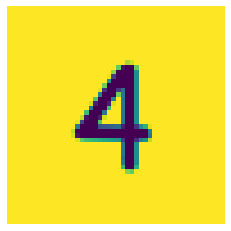

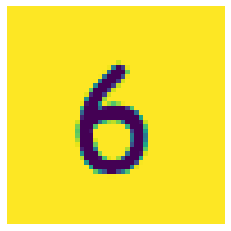

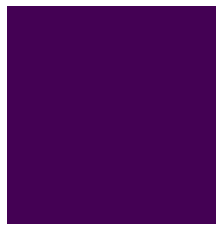

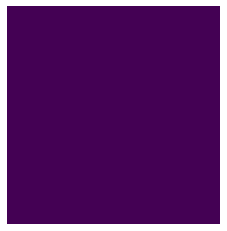

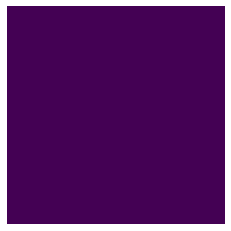

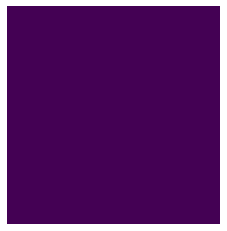

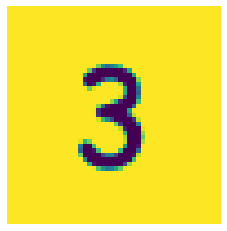

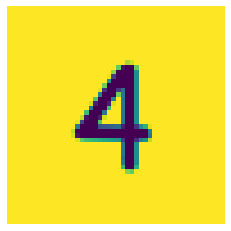

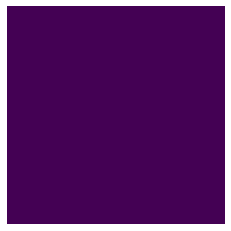

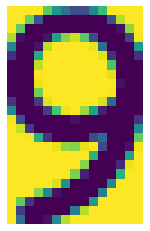

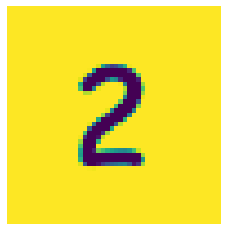

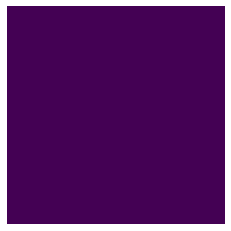

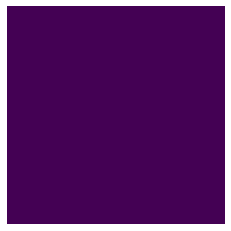

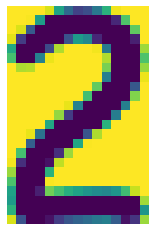

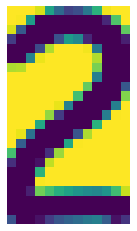

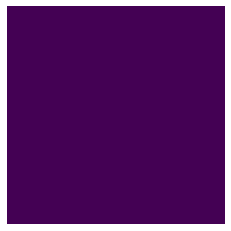

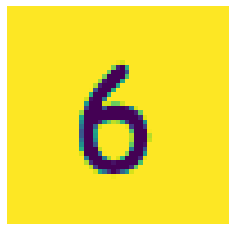

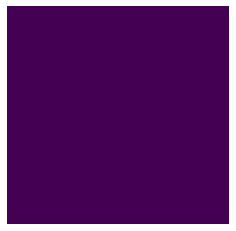

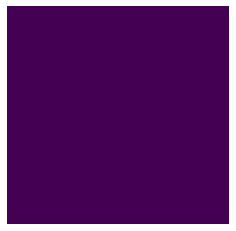

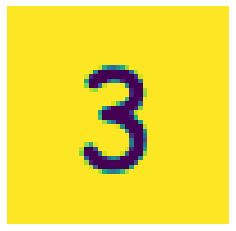

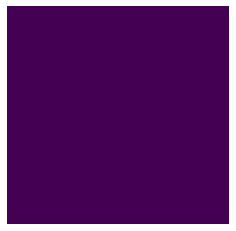

In [24]:
img = cv2.imread("../data/sudoku_emp.png")
rps = get_rp_from_mser(img)
for i in rps:
    print(i.shape)
    plt.axis("off")
    plt.imshow(i)
    plt.show()